# Basic visualisation of preprocessed data sets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [3]:
import brsflufight_nerc2  as bff2

## Load data

Well that's easy ;-)

In [4]:
data_sets, data_columns = bff2.load_data_files()

bff2.summarise_data(data_sets, data_columns)

historical_GHG_Sectors_GCP
--------------------------------------
Index(['Bunkers', 'Cement', 'Coal', 'Gas', 'Gas flaring', 'Oil',
       'Total fossil fuels and cement'],
      dtype='object')
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11502 entries, ('Afghanistan', 'CO2', Timestamp('1960-01-01 00:00:00')) to ('Zimbabwe', 'CO2', Timestamp('2018-01-01 00:00:00'))
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        11502 non-null  object        
 1   GH_Gas                         11502 non-null  object        
 2   date                           11502 non-null  datetime64[ns]
 3   Data source                    11502 non-null  object        
 4   Unit                           11502 non-null  object        
 5   max_year                       11502 non-null  int64         
 6   Bunkers       

## Visualising mobility

In [5]:
def plot_mobility(data_source, data_zone, data_sets, data_columns):
    df = data_sets[data_source]
    cols = data_columns[data_source]

    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(14,5)
    fig.suptitle(f"{data_source} in {data_zone}")

    # same plot as above
    axs[0].set_title('Raw mobility data')
    df.loc[data_zone].plot(y=cols, ax=axs[0])
    # 7 Day rolling average
    axs[1].set_title('Weekly averaged mobility data')
    df.loc[data_zone, cols].rolling('7D').mean().plot(ax=axs[1])

### Google

In [6]:
# We use the helper function to identify the exact name of what we're looking for:
print(bff2.find_matching_geo_id(data_sets['mobility_google'], 'GB_United Kingdom', 'nan_'))

['GB_United Kingdom', 'GB_United Kingdom_Greater Londo', 'GB_United Kingdom_Greater Manchester', 'GB_United Kingdom_Merseyside', 'GB_United Kingdom_Na h-Eileanan an Iar', 'GB_United Kingdom_South Yorkshire', 'GB_United Kingdom_Tyne and Wear', 'GB_United Kingdom_West Midlands', 'GB_United Kingdom_West Yorkshire']


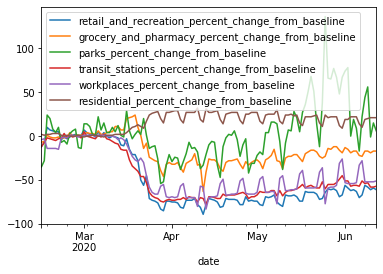

In [7]:
data_sets[
    'mobility_google'  # pick a data set
].loc[
    'GB_United Kingdom'  # use loc to pick a zone (can be done because it is a multi index)
].plot(
    y=data_columns['mobility_google']  # specify the columns to plot
)

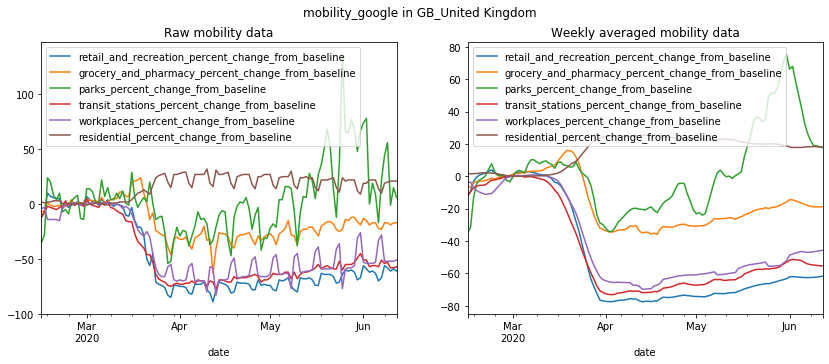

In [8]:
data_source = 'mobility_google'
data_zone = 'GB_United Kingdom'

plot_mobility(data_source, data_zone, data_sets, data_columns)

### Apple

In [9]:
print(bff2.find_matching_geo_id(data_sets['mobility_apple'], 'country/region_Unite', 'nan_'))

['country/region_United Arab Emirates', 'country/region_United Kingdom', 'country/region_United States']


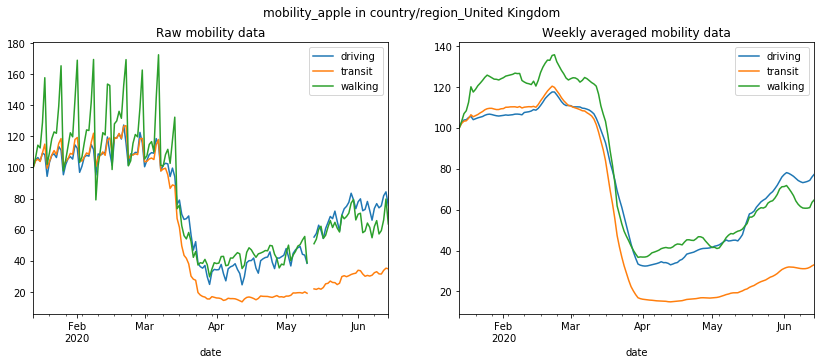

In [10]:
data_source = 'mobility_apple'
data_zone = 'country/region_United Kingdom'

plot_mobility(data_source, data_zone, data_sets, data_columns)

### Citymapper

In [11]:
citymap_mob = data_sets["mobility_citymapper"]

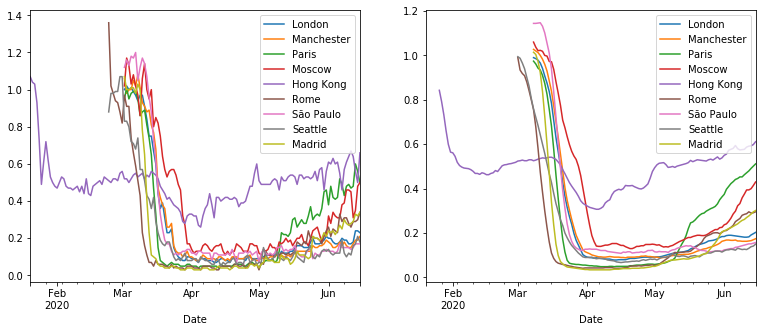

In [12]:
city_list = ['London', 'Manchester', 'Paris', 'Moscow', 'Hong Kong', 'Rome', 'São Paulo', 'Seattle', 'Madrid']

fig, axs = plt.subplots(1,2)
axs[0].figure.set_size_inches(13, 5)
citymap_mob[city_list].plot(ax=axs[0])
citymap_mob[city_list].rolling(7).mean().plot(ax=axs[1])

## Historical GHG emissions

In [13]:
def squarish_layout(n, h_max=4):
    if n <= 0:
        ValueError()
    nh = min(math.ceil(math.sqrt(n)), h_max)
    nv = math.ceil(n/nh)
    return nv,nh

def rectangular_layout(n, h_max=4):
    if n <= 0:
        ValueError()
    
    nv = math.ceil(n / h_max)
    nh = math.ceil(n / nv) 
    
    return nv,nh
    

def plot_historical_GHG(
    data_sets, data_columns,
    data_source,
    countries,
    gases,
    Sectors=None,
):
    if Sectors is None:
        Sectors = data_columns[data_source]

    df = data_sets[data_source]
    for sector in Sectors:
        fig, axs = plt.subplots(1, len(gases))
        fig.suptitle(sector)
        fig.set_size_inches(len(gases)*5 + 2, 5)
        for i, gas in enumerate(gases):
            for country in countries:
                idx = (country, gas)
                df.loc[idx].plot(x="date", y=sector, label=f"{idx}", ax=axs[i])
            unit = df.loc[idx, "Unit"].unique()[-1]
            axs[i].set_ylabel(f"{gas} [{unit}]")
            axs[i].set_title(f"{gas}")

def plot_historical_GHG_Sector(
    data_sets, data_columns,
    data_source,
    countries,
    gases,
    Sectors=None,
):
    if Sectors is None:
        Sectors = data_columns[data_source]
        print(Sectors)

    df = data_sets[data_source]
    for gas in gases:
        layout = rectangular_layout(len(Sectors), h_max=4)
        fig, axs = plt.subplots(layout[0], layout[1])
        fig.suptitle(gas)
        fig.set_size_inches(layout[1]*5 + 2, layout[0]*5)
        axs = axs.flatten()
        for i, sector in enumerate(Sectors):
            for country in countries:
                idx = (country, gas)
                df.loc[idx].plot(x="date", y=sector, label=f"{idx}", ax=axs[i])
            unit = df.loc[idx, "Unit"].unique()[-1]
            axs[i].set_ylabel(f"{gas} [{unit}]")
            axs[i].set_title(f"{sector}")

In [14]:
rectangular_layout(1, h_max=4)

(1, 1)

### PIK dataset

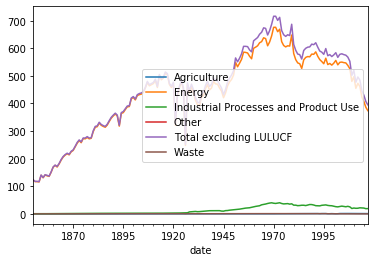

In [15]:
data_source = 'historical_GHG_Sectors_PIK'
data_sets[data_source].loc[('United Kingdom', 'CO2')].plot(y=data_columns[data_source])

A better plotting option is available

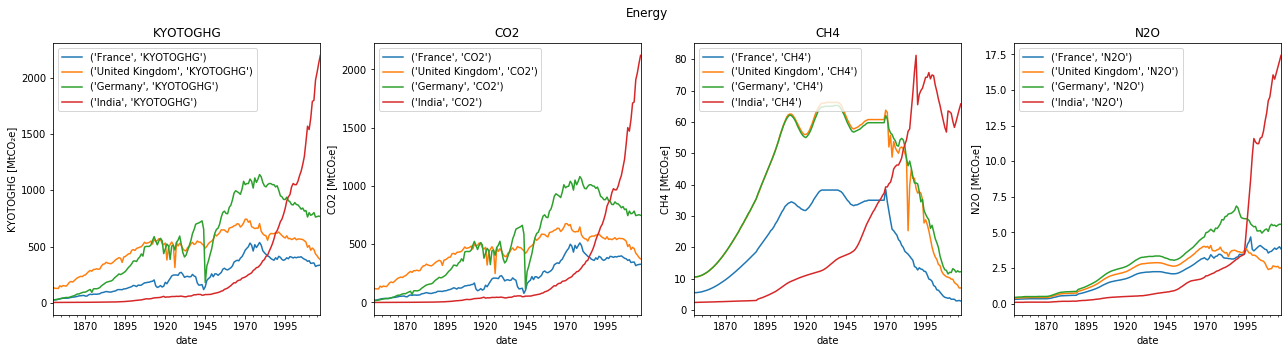

In [16]:
Sectors = [
    "Energy",
]
gases = ["KYOTOGHG", "CO2", "CH4", "N2O"]
countries = ["France", "United Kingdom", "Germany", "India"]
plot_historical_GHG(data_sets, data_columns,data_source, countries, gases,Sectors)

This can also be done for all sectors

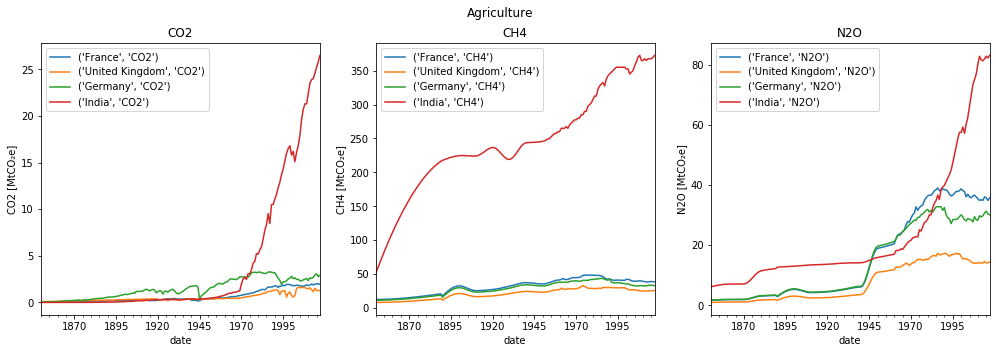

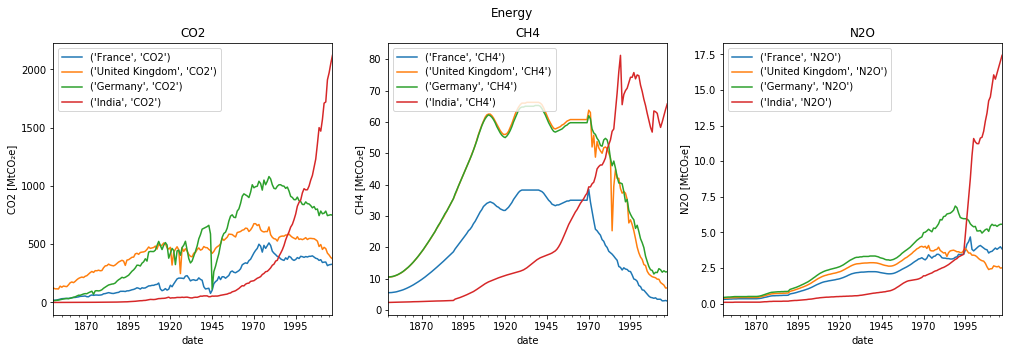

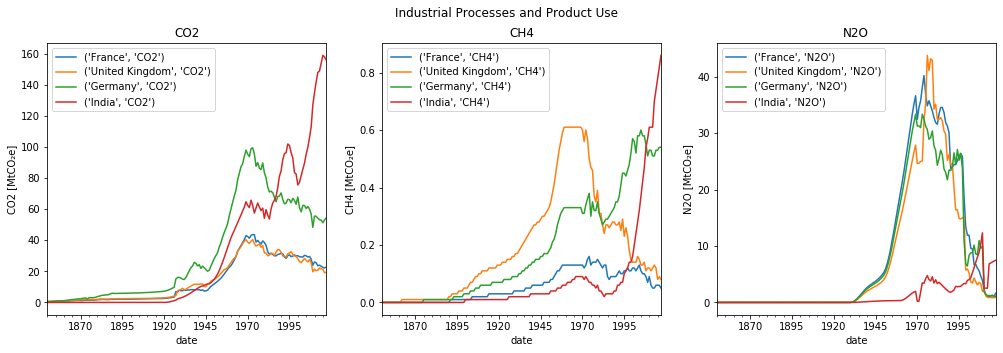

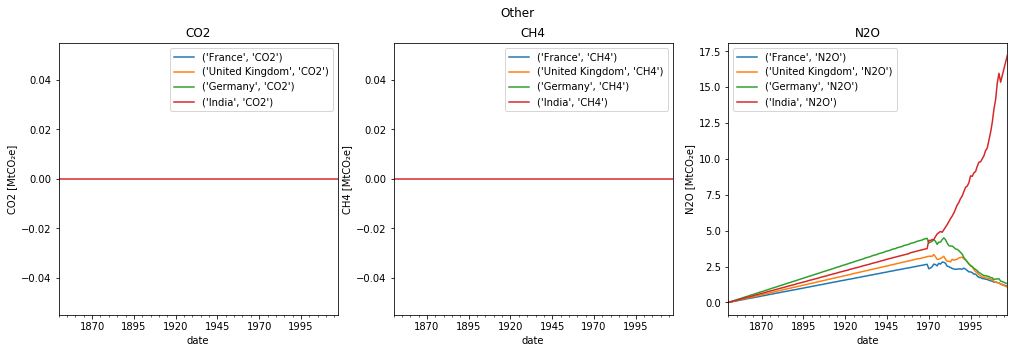

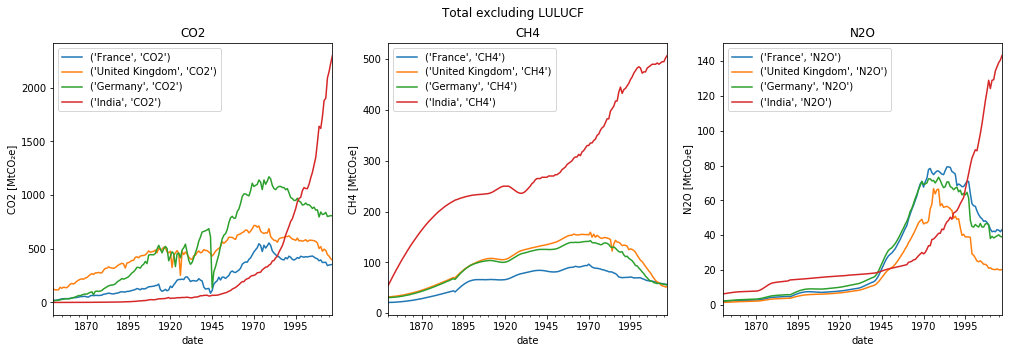

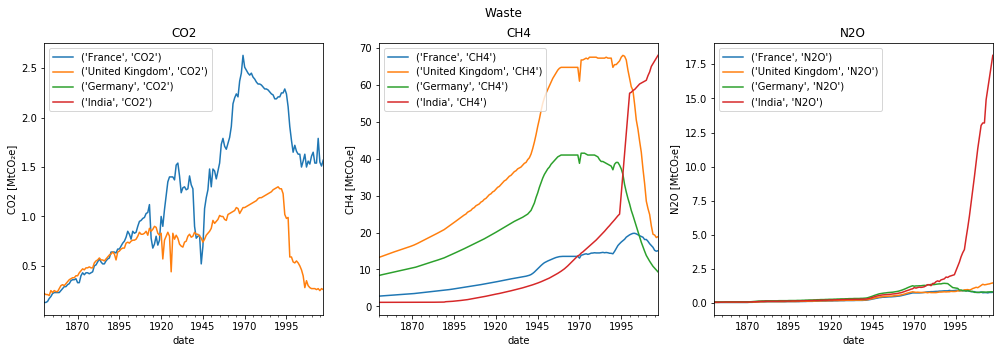

In [17]:
gases = ["CO2", "CH4", "N2O"]
plot_historical_GHG(data_sets, data_columns,data_source, countries, gases)

### Global carbon project data set

This dataset is completely different as it shows CO2 sources by fuels

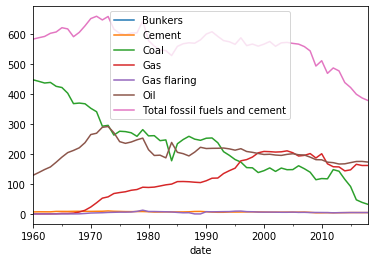

In [18]:
data_source = 'historical_GHG_Sectors_GCP'
data_sets[data_source].loc[('United Kingdom', 'CO2')].plot(y=data_columns[data_source])

Index(['Bunkers', 'Cement', 'Coal', 'Gas', 'Gas flaring', 'Oil',
       'Total fossil fuels and cement'],
      dtype='object')


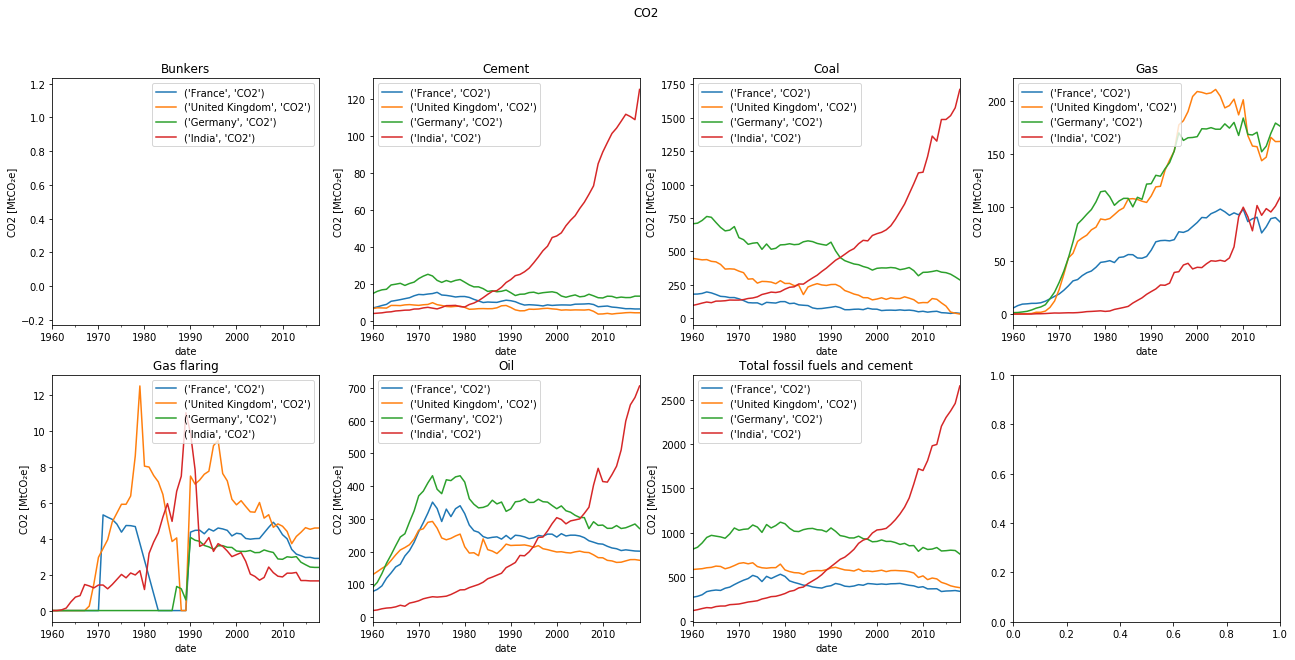

In [19]:
plot_historical_GHG_Sector(data_sets, data_columns,data_source, countries, ['CO2'])

### UNFCCC

In [22]:
data_sets[data_source]

Country          GH_Gas       date  \
Country     GH_Gas         date                                                 
Afghanistan Aggregate GHGs 2005-01-01  Afghanistan  Aggregate GHGs 2005-01-01   
                           2013-01-01  Afghanistan  Aggregate GHGs 2013-01-01   
Albania     Aggregate GHGs 1990-01-01      Albania  Aggregate GHGs 1990-01-01   
                           1991-01-01      Albania  Aggregate GHGs 1991-01-01   
                           1992-01-01      Albania  Aggregate GHGs 1992-01-01   
...                                            ...             ...        ...   
Zambia      Aggregate GHGs 1994-01-01       Zambia  Aggregate GHGs 1994-01-01   
                           2000-01-01       Zambia  Aggregate GHGs 2000-01-01   
Zimbabwe    Aggregate GHGs 1994-01-01     Zimbabwe  Aggregate GHGs 1994-01-01   
                           2000-01-01     Zimbabwe  Aggregate GHGs 2000-01-01   
                           2006-01-01     Zimbabwe  Aggregate GHGs 2006-01-01   

                                      Data source    Unit  max_year  \
Country     GH_Gas         date                                       
Afghanistan Aggregate GHGs 2005-01-01  UNFCCC_NAI  MtCO₂e      2013   
                           2013-01-01  UNFCCC_NAI  MtCO₂e      2013   
Albania     Aggregate GHGs 1990-01-01  UNFCCC_NAI  MtCO₂e      2009   
                           1991-01-01  UNFCCC_NAI  MtCO₂e      2009   
                           1992-01-01  UNFCCC_NAI  MtCO₂e      2009   
...                                           ...     ...       ...   
Zambia      Aggregate GHGs 1994-01-01  UNFCCC_NAI  MtCO₂e      2000   
                           2000-01-01  UNFCCC_NAI  MtCO₂e      2000   
Zimbabwe    Aggregate GHGs 1994-01-01  UNFCCC_NAI  MtCO₂e      2006   
                           2000-01-01  UNFCCC_NAI  MtCO₂e      2006   
                           2006-01-01  UNFCCC_NAI  MtCO₂e      2006   

                                       Agriculture  Energy  \
Country     GH_Gas         date                              
Afghanistan Aggregate GHGs 2005-01-01        15.11    3.78   
                           2013-01-01        32.74   10.28   
Albania     Aggregate GHGs 1990-01-01         0.88    3.11   
                           1991-01-01         0.85    5.06   
                           1992-01-01         0.80    3.35   
...                                            ...     ...   
Zambia      Aggregate GHGs 1994-01-01        13.62   17.41   
                           2000-01-01        10.36    2.63   
Zimbabwe    Aggregate GHGs 1994-01-01         5.71   16.76   
                           2000-01-01        39.57   26.50   
                           2006-01-01         9.01   10.62   

                                       Industrial Processes  \
Country     GH_Gas         date                               
Afghanistan Aggregate GHGs 2005-01-01                  0.31   
                           2013-01-01                  0.21   
Albania     Aggregate GHGs 1990-01-01                  0.21   
                           1991-01-01                  0.42   
                           1992-01-01                  0.25   
...                                                     ...   
Zambia      Aggregate GHGs 1994-01-01                  0.33   
                           2000-01-01                  1.01   
Zimbabwe    Aggregate GHGs 1994-01-01                  4.59   
                           2000-01-01                  1.04   
                           2006-01-01                  0.92   

                                       Land-Use Change and Forestry  Other  \
Country     GH_Gas         date                                              
Afghanistan Aggregate GHGs 2005-01-01                          9.43    NaN   
                           2013-01-01                         11.16    NaN   
Albania     Aggregate GHGs 1990-01-01                          3.49    NaN   
                           1991-01-01           

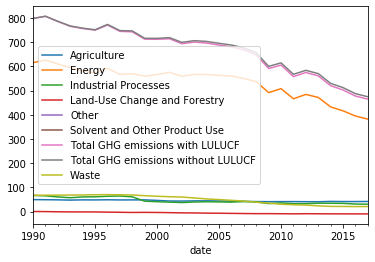

In [23]:
data_source = 'historical_GHG_Sectors_UNFCCC'
data_sets[data_source].loc[('United Kingdom', 'Aggregate GHGs')].plot(y=data_columns[data_source])

Index(['Agriculture', 'Energy', 'Industrial Processes',
       'Land-Use Change and Forestry', 'Other',
       'Solvent and Other Product Use', 'Total GHG emissions with LULUCF',
       'Total GHG emissions without LULUCF', 'Waste'],
      dtype='object')


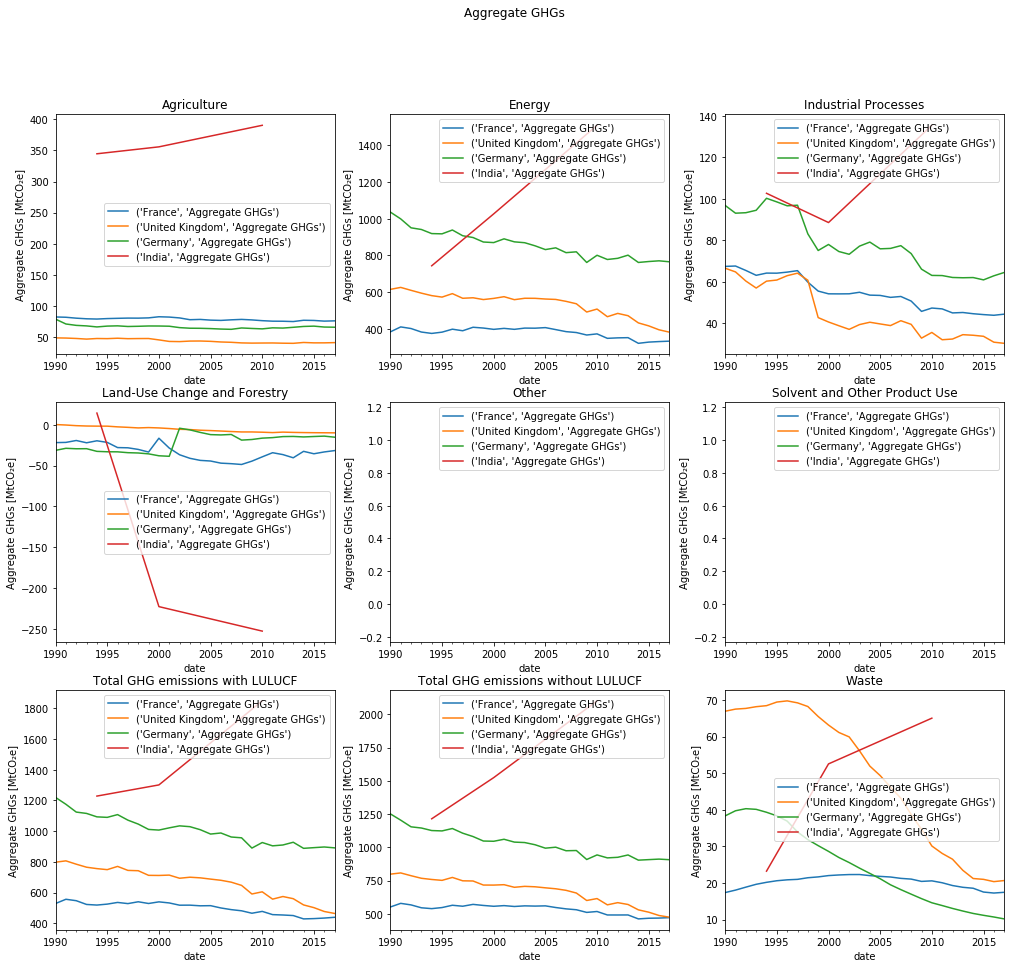

In [24]:
plot_historical_GHG_Sector(data_sets, data_columns,data_source, countries, ['Aggregate GHGs'])

## Energy data for the UK

In [30]:
data_source = 'uk_energy_daily'

Text(0, 0.5, 'Power [MW]')

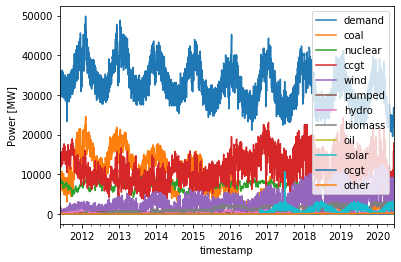

In [31]:
data_sets[data_source].plot(y=data_columns[data_source])
plt.ylabel('Power [MW]')

Text(0, 0.5, 'Power [MW]')

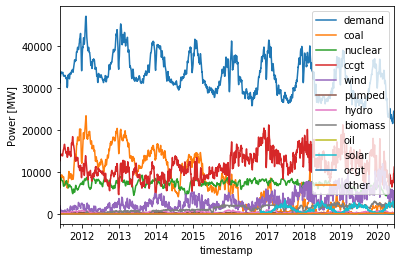

In [33]:
data_sets[data_source].rolling('7D').mean().plot(y=data_columns[data_source])
plt.ylabel('Power [MW]')

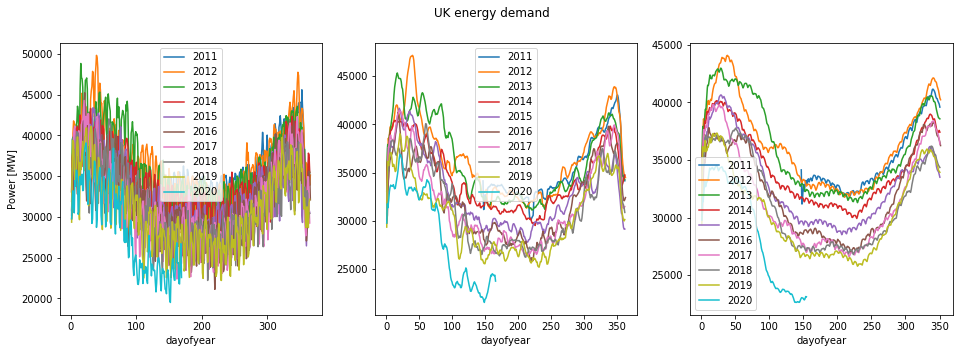

In [47]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16,5)
fig.suptitle("UK energy demand")
axs[0].set_ylabel('Power [MW]')
data_sets[data_source]["dayofyear"] = data_sets[data_source].index.dayofyear
for year in data_sets[data_source].index.year.unique():
    year = str(year)
    data_sets[data_source][year].rolling('1D').mean().plot(
        x="dayofyear", y="demand", ax=axs[0], label=year)
    data_sets[data_source][year].rolling('7D').mean().plot(
        x="dayofyear", y="demand", ax=axs[1], label=year)
    data_sets[data_source][year].rolling('30D').mean().plot(
        x="dayofyear", y="demand", ax=axs[2], label=year)